<a href="https://colab.research.google.com/github/abhikadam27/Deep-Learning/blob/main/Mnist_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## MNIST using CNN



In [ ]:

import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.utils.vis_utils import plot_model

In [ ]:
from keras.datasets import mnist

In [ ]:
#loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train[0]

5

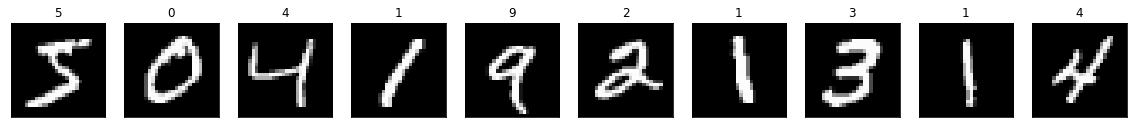

In [ ]:
fig, axes = plt.subplots(ncols = 10, sharex = False, sharey=True, figsize = (20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap = 'gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)


In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape= (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


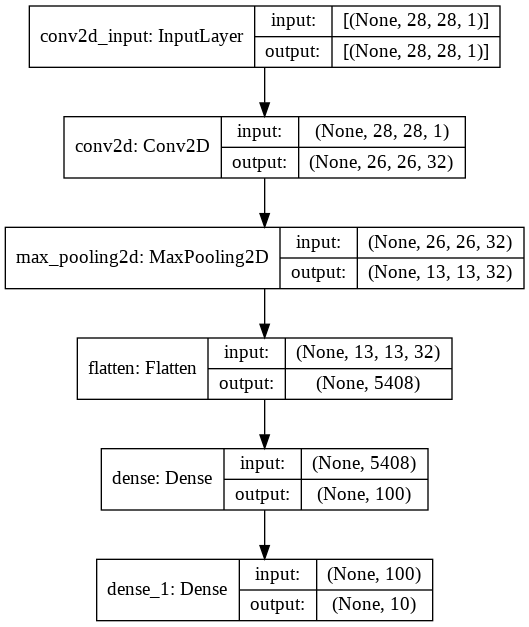

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, Y_train, batch_size=32, epochs=2,verbose=1, validation_data = (x_test, Y_test))

Epoch 1/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1466 - accuracy: 0.9549 - val_loss: 0.0596 - val_accuracy: 0.9802
Epoch 2/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0579 - val_accuracy: 0.9800


In [ ]:
model.save('mnist_cnn_model.h5')

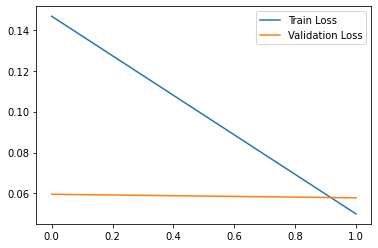

In [ ]:
plt.plot(model.history.history['loss'], label = 'Train Loss')
plt.plot(model.history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

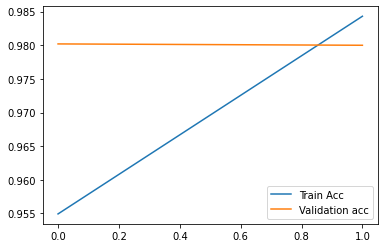

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'Train Acc')
plt.plot(model.history.history['val_accuracy'], label = 'Validation acc')
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model('mnist_cnn_model.h5')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

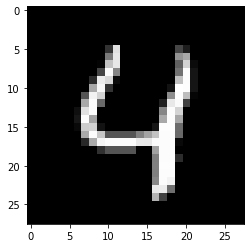

In [ ]:
plt.imshow(x_test[4], cmap = 'gray')

In [ ]:
x = np.reshape(x_test[4],(1,28,28,1))

In [ ]:
np.argmax(model.predict(x))

4